In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1. Carregamento de dados

In [65]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt')
bmi = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BMX_L.xpt')
bp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt')

### 2. Merge dos dados

In [66]:
data = pd.merge(demo[['SEQN', 'RIDAGEYR']], bmi[['SEQN', 'BMXBMI']], on='SEQN')
data = pd.merge(data, bp[['SEQN', 'BPXOSY1']], on='SEQN')

### 3. Filtragem dos dados

In [67]:
data = data[(data['RIDAGEYR'] >= 20) & (data['RIDAGEYR'] <= 60)]
data = data.dropna(subset=['BMXBMI', 'BPXOSY1'])
data.head()

,SEQN,RIDAGEYR,BMXBMI,BPXOSY1
0,130378.0,43.0,27.0,135.0
2,130380.0,44.0,29.7,111.0
3,130386.0,34.0,30.2,110.0
5,130388.0,27.0,43.7,130.0
6,130389.0,59.0,28.0,145.0


### 4. Análise exploratória

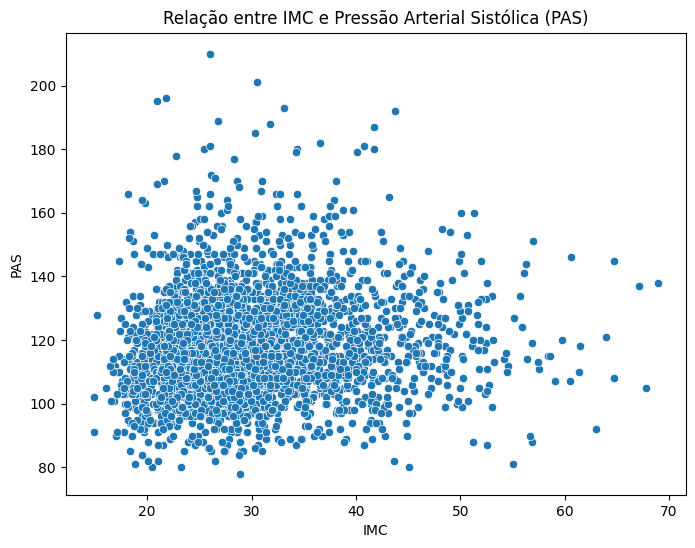

In [68]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BPXOSY1', data=data)
plt.title('Relação entre IMC e Pressão Arterial Sistólica (PAS)')
plt.xlabel('IMC')
plt.ylabel('PAS')
plt.show()

### 5. Estimativa do modelo

In [69]:
X = data[['BMXBMI']]
y = data['BPXOSY1']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

### 6. Avaliação do modelo

In [70]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Coeficiente de regressão: {coef:.2f}')

R²: 0.01
MSE: 240.71
MAE: 11.86
Coeficiente de regressão: 0.21


### 7. Interpretação